**Cohort Analysis:** 

Process We Can Follow Cohort analysis is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. Below is the process we can follow for the task of Cohort Analysis:

1. The first step is to define the cohorts based on a specific characteristic or event. For example, in an e-commerce platform, cohorts could be defined based on the month of a user’s first purchase.
2. Gather relevant data for analysis.
3. Determine the time intervals you want to analyze.
4. Group users into cohorts based on the defined characteristic or event.
5. Choose the key performance metrics you want to analyze.
6. Calculate the chosen metrics for each cohort over the specified time periods.
7. Create visualizations to present your findings effectively.

A dataset for Cohort Analysis typically includes user or customer data, such as registration date, purchase history, engagement metrics, or any other data points relevant to the analysis. I found an ideal dataset for this task.

In [1]:
import pandas as pd
data=pd.read_csv("/kaggle/input/cohort-analysis-case-study/cohorts.csv")
mull_data=data.isnull().sum()
print("Check NUll Values")
print(mull_data)
data_types=data.dtypes
print("-"*20)
print("Check Columns")
print(data_types)
data['Date']=pd.to_datetime(data['Date'],format='%d/%m/%Y')

Check NUll Values
Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64
--------------------
Check Columns
Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


In [2]:
des=data.describe()
print(des)

                      Date    New users  Returning users  Duration Day 1  \
count                   30    30.000000        30.000000       30.000000   
mean   2023-11-08 12:00:00  3418.166667      1352.866667      208.259594   
min    2023-10-25 00:00:00  1929.000000       784.000000       59.047619   
25%    2023-11-01 06:00:00  3069.000000      1131.500000      182.974287   
50%    2023-11-08 12:00:00  3514.500000      1388.000000      206.356554   
75%    2023-11-15 18:00:00  3829.500000      1543.750000      230.671046   
max    2023-11-23 00:00:00  4790.000000      1766.000000      445.872340   
std                    NaN   677.407486       246.793189       64.730830   

       Duration Day 7  
count       30.000000  
mean       136.037157  
min          0.000000  
25%         68.488971  
50%        146.381667  
75%        220.021875  
max        304.350000  
std         96.624319  


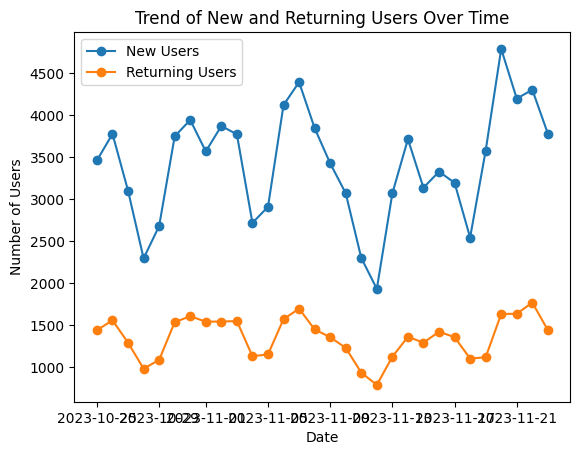

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data['Date'], data['New users'], marker='o', label='New Users')
plt.plot(data['Date'], data['Returning users'], marker='o', label='Returning Users')
plt.title('Trend of New and Returning Users Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.show()


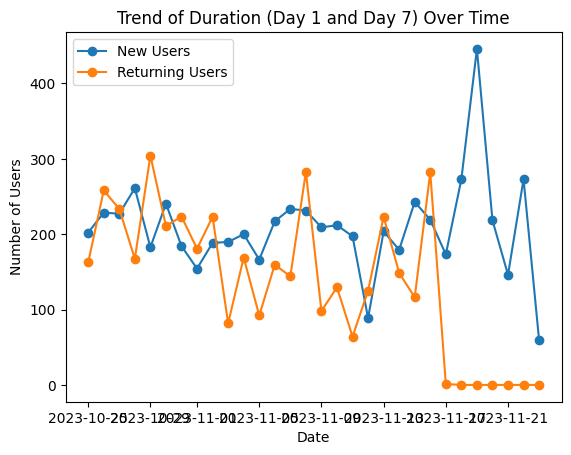

In [4]:
plt.figure()
plt.plot(data['Date'], data['Duration Day 1'], marker='o', label='New Users')
plt.plot(data['Date'], data['Duration Day 7'], marker='o', label='Returning Users')
plt.title('Trend of Duration (Day 1 and Day 7) Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

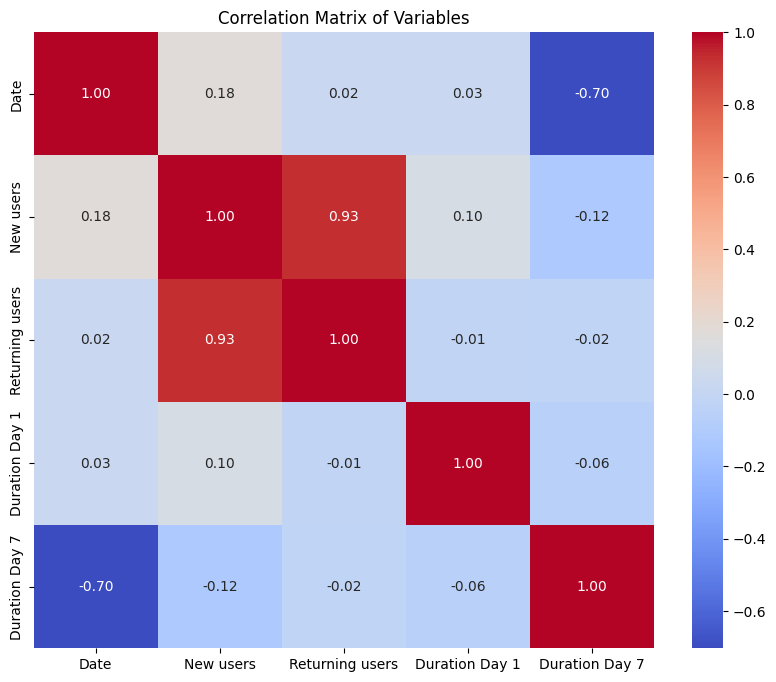

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [6]:
data['Week'] = data['Date'].dt.isocalendar().week
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


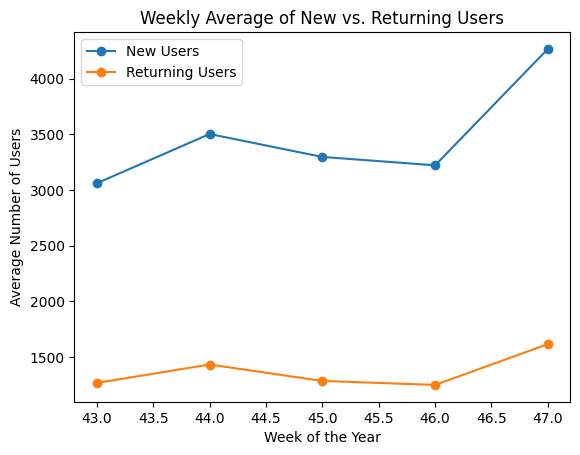

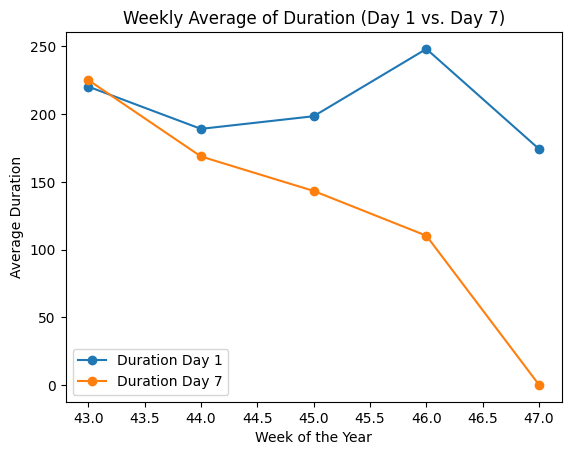

In [7]:
import matplotlib.pyplot as plt

# Plot for 'Weekly Average of New vs. Returning Users'
plt.figure()
plt.plot(weekly_averages['Week'], weekly_averages['New users'], marker='o', label='New Users')
plt.plot(weekly_averages['Week'], weekly_averages['Returning users'], marker='o', label='Returning Users')
plt.title('Weekly Average of New vs. Returning Users')
plt.xlabel('Week of the Year')
plt.ylabel('Average Number of Users')
plt.legend()
plt.show()

# Plot for 'Weekly Average of Duration (Day 1 vs. Day 7)'
plt.figure()
plt.plot(weekly_averages['Week'], weekly_averages['Duration Day 1'], marker='o', label='Duration Day 1')
plt.plot(weekly_averages['Week'], weekly_averages['Duration Day 7'], marker='o', label='Duration Day 7')
plt.title('Weekly Average of Duration (Day 1 vs. Day 7)')
plt.xlabel('Week of the Year')
plt.ylabel('Average Duration')
plt.legend()
plt.show()


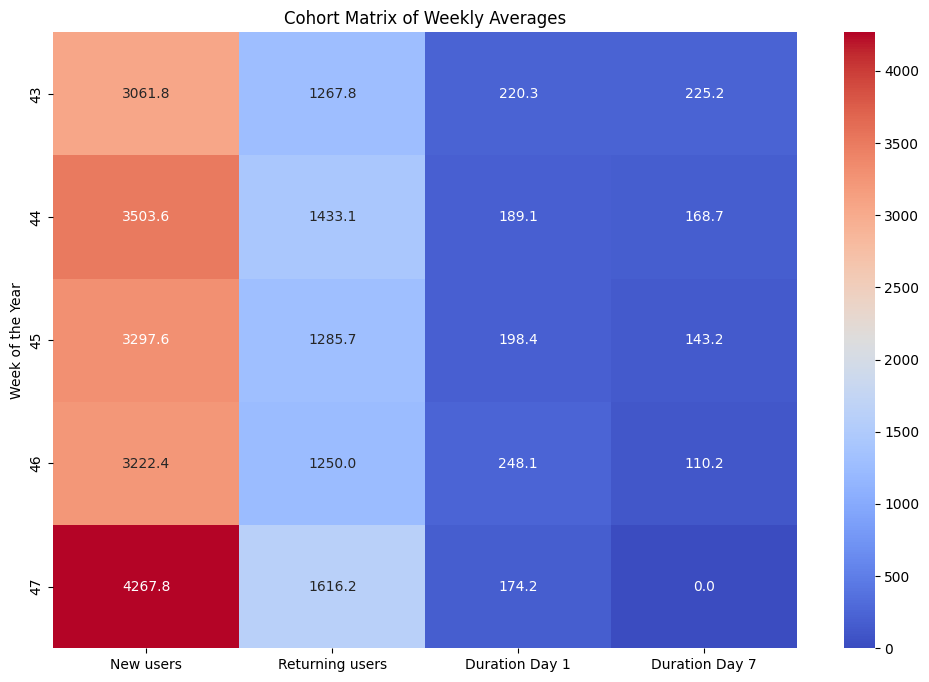

In [8]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()